# Setup for the tutorial

Benjamin Irving, 2018

- These are the setup steps required to run the tutorial
- Aim to create a python environment to run the examples and download the data. 
- This setup assumes a basic knowledge of Python. If you can't set it up by yourself feel free to message or try and find someone to help. 
- You can just attend the tutorial without setting up the environment yourself but running it yourself will give you more insight into how to set up these deep learning systems. 


# Step 1: Get the tutorial code

Download the tutorial repository (still a work in progress and will be updated)

https://github.com/benjaminirving/SSIMA-2018-keras-unet-tutorial


Or using git:  
`git clone git@github.com:benjaminirving/SSIMA-2018-keras-unet-tutorial.git`

# Step 2: Python environment



# Setup the deep learning environment used in this tutorial  (CPU)

- Fast enough for testing a trained model
- Slow for training (need GPU install)
- Use either Anaconda python (Windows, Linux, macOS) 
- or Python 3 from the linux package manager / macos homebrew


### Option 1: Anaconda Python
- Recommended for Windows and if new to python
- Install Anaconda (https://www.anaconda.com/download/) or miniconda (https://conda.io/miniconda.html)
- In the tutorial folder run the following
- `conda env create -f environment-cpu.yml`
- `source activate ssima-tutorial` activates the environment



### Option 2: Native python
- I prefer this option for Linux and macOS but it can be slightly more complicated to setup
- Install python 3 (e.g. from homebrew for macos, apt-get for linux etc)
- Install pipenv (https://docs.pipenv.org/)
- In the tutorial folder run the following
- `pipenv install` 
- `pipenv shell` activates the environment


# Setup for deep learning on the GPU

- **Not part of this tutorial but useful as a reference**
- Requires tensorflow-gpu instead of the tensorflow package, a compatible Nvidia gpu with matching cuda and cudnn. 
- See: https://www.tensorflow.org/install/
- Pipenv files are in `env_gpu` folder
- This method was used for training the model




# Testing the installation

- Copy the code below into a file called `mnist_cnn.py`
- Activate the python environment
- Run the example below using `python mnist_cnn.py`

### What's going on?
- Training a CNN on the mnist dataset
- When finished predicts the number from an input image
- Example from: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 6s 96us/step - loss: 0.2643 - acc: 0.9179 - val_loss: 0.0588 - val_acc: 0.9806
Epoch 2/4
60000/60000 [==============================] - 5s 88us/step - loss: 0.0875 - acc: 0.9740 - val_loss: 0.0382 - val_acc: 0.9864
Epoch 3/4
60000/60000 [==============================] - 5s 88us/step - loss: 0.0652 - acc: 0.9803 - val_loss: 0.0345 - val_acc: 0.9882
Epoch 4/4
60000/60000 [==============================] - 5s 87us/step - loss: 0.0541 - acc: 0.9838 - val_loss: 0.0311 - val_acc: 0.9887
Test loss: 0.03106632049891923
Test accuracy: 0.9887


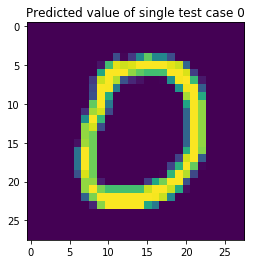

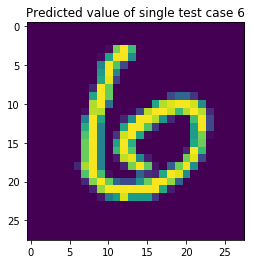

In [16]:
'''

Example from: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py
Copyright (c) 2015 - 2018, François Chollet.
Licence: https://github.com/keras-team/keras/blob/master/LICENSE

Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

%matplotlib inline

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import matplotlib.pyplot as plt
import numpy as np

batch_size = 128
num_classes = 10
epochs = 4

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
pred = model.predict(x_test)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Look at the predictions from a few cases

plt.figure()
plt.imshow(np.squeeze(x_test[10]))
plt.title('Predicted value of single test case {}'.format(np.argmax(pred[10])))

plt.figure()
plt.imshow(np.squeeze(x_test[11]))
plt.title('Predicted value of single test case {}'.format(np.argmax(pred[11])))
plt.show()



# Step 3: Download the dataset

DRIVE: Digital Retinal Images for Vessel Extraction

- Download data from: http://www.isi.uu.nl/Research/Databases/DRIVE/
- Fill in email and get unique code to download data
- Unzip and save the data to `data/DRIVE` in your folder


![img/data.jpg](img/data.jpg)


**Note**: *All of the images contained in the database were actually used for making clinical diagnoses. To ensure the utmost protection of patient privacy, information that might allow the identity of a patient to be reconstructed has been removed, and we have no actual knowledge that the images could be used alone or in combination to identify any subject. To minimize any further risk of breach of privacy, the use of this database is restricted to those individuals or organizations that obtained the database directly from this website.*

# Step 4: Convert the images into a numpy array

Run the following in the SSIMA directory with the python environment activated

`python create_dataset.py`  

The Following will be created:

`imgs_test.npz`   
`imgs_train.npz`  



# Step 5: Pretrained model

A pretrained model will be shared during the tutorial

# All set! See you at SSIMA 2018!

In [17]:
print('See you at SSIMA 2018')

See you at SSIMA 2018
